In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
Car_data = pd.read_csv("car_evaluation.csv", header = None)
Car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
Car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
Test_Car_data = pd.read_csv("car_evaluation.csv", header = None)
Test_Car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
Test_Car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
Car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


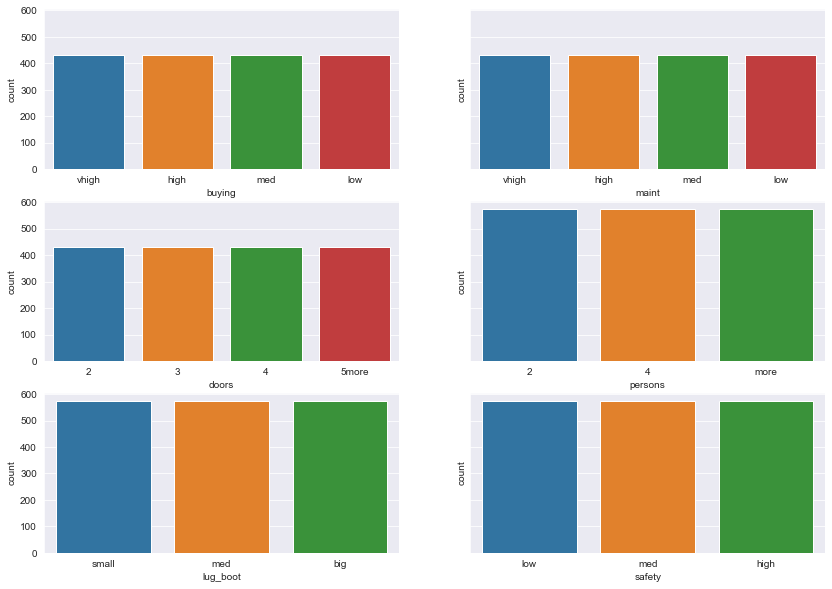

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, figsize=(14, 10))

sns.countplot(x=Car_data['buying'], ax=axes[0][0])
sns.countplot(x=Car_data['maint'], ax=axes[0][1])
sns.countplot(x=Car_data['doors'], ax=axes[1][0])
sns.countplot(x=Car_data['persons'], ax=axes[1][1])
sns.countplot(x=Car_data['lug_boot'], ax=axes[2][0])
sns.countplot(x=Car_data['safety'], ax=axes[2][1])

plt.show()

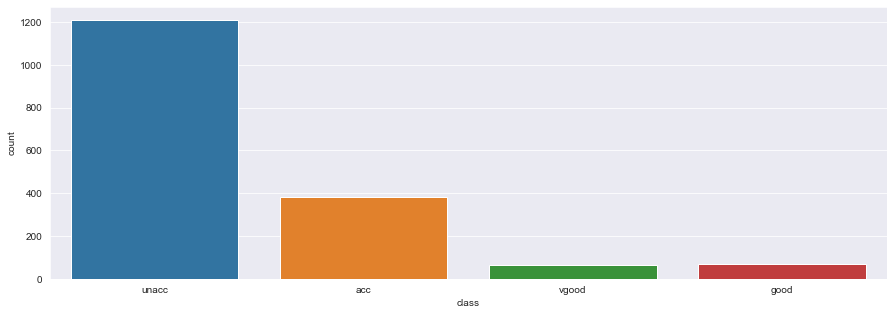

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [7]:
sns.countplot(x=Car_data['class'])
plt.show()
Car_data['class'].value_counts()

In [8]:
Car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
buying_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
maint_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
door_mappings = {'2':2, '3':3, '4':4, '5more':5}
persons_mappings = {'2':2, '4':4, 'more':5}
lug_boot_mappings = {'small':0, 'med':1, 'big':2}
safety_mappings = {'low':0, 'med':1, 'high':2}
class_mappings = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

In [10]:
Car_data['buying'] = Car_data['buying'].map(buying_mappings)
Car_data['maint'] = Car_data['maint'].map(maint_mappings)
Car_data['doors'] = Car_data['doors'].map(door_mappings)
Car_data['persons'] = Car_data['persons'].map(persons_mappings)
Car_data['lug_boot'] = Car_data['lug_boot'].map(lug_boot_mappings)
Car_data['safety'] = Car_data['safety'].map(safety_mappings)
Car_data['class'] = Car_data['class'].map(class_mappings)

In [11]:
Car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [12]:
from sklearn.model_selection import train_test_split

X = Car_data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = Car_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [14]:
y_pred_gini = clf_gini.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7746


In [16]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7990
Test set score: 0.7746


NameError: name 'tree' is not defined

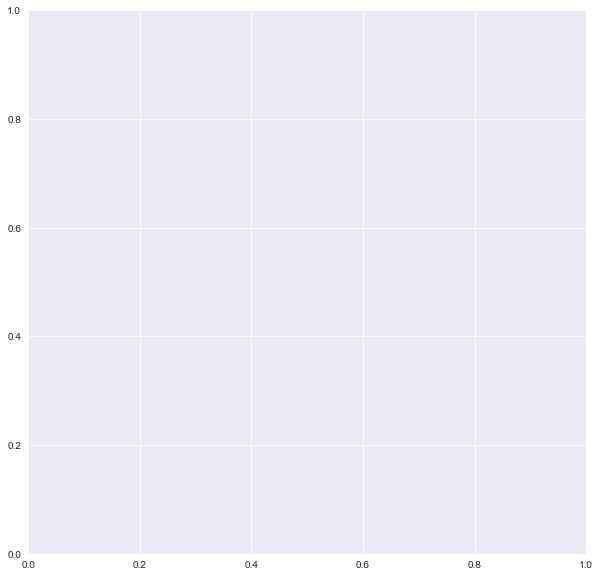

In [17]:
#from sklearn import tree
#tree.plot_tree(clf_gini) 
#plt.show()

fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_gini, filled=True, rounded=True,
                     feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))

In [ ]:
Test_Car_data.head()

In [ ]:
Test_Car_data['buying'] = Test_Car_data['buying'].map(buying_mappings)
Test_Car_data['maint'] =Test_Car_data['maint'].map(maint_mappings)
Test_Car_data['doors'] = Test_Car_data['doors'].map(door_mappings)
Test_Car_data['persons'] = Test_Car_data['persons'].map(persons_mappings)
Test_Car_data['lug_boot'] = Test_Car_data['lug_boot'].map(lug_boot_mappings)
Test_Car_data['safety'] = Test_Car_data['safety'].map(safety_mappings)
Test_Car_data['class'] = Test_Car_data['class'].map(class_mappings)

In [ ]:
Test_Car_data.head()

In [ ]:
from sklearn.model_selection import train_test_split

X = Test_Car_data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = Test_Car_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_gini, filled=True, rounded=True,
                     feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [ ]:
X = Test_Car_data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = Test_Car_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_gini, filled=True, rounded=True,
                     feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [ ]:
X = Test_Car_data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = Test_Car_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_gini, filled=True, rounded=True,
                     feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)